In [205]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

%matplotlib inline

In [206]:
Users = pd.read_csv('./data/User.csv')
OrderItems = pd.read_csv('./data/OrderItems.csv')
OrderDetails = pd.read_csv('./data/OrderDetails.csv')
Product = pd.read_csv('./data/Product.csv')
ProductCategory = pd.read_csv('./data/ProductCategory.csv')
PaymentDetails = pd.read_csv('./data/PaymentDetails.csv')

In [207]:
def calculate_age(x):
    return pd.to_datetime('today').year-pd.to_datetime(x).year

In [208]:
def createUserCategorizationPlot():
    age_data = Users["date_of_birth"].apply(calculate_age).tolist()
    age_data_labels = []
    for age in age_data:
        if age < 18:
           age_data_labels.append('Kids') 
        elif age >= 18 and age < 25:
           age_data_labels.append('Young Adults') 
        elif age >= 25 and age <30:
           age_data_labels.append('Adults') 
        else:
           age_data_labels.append('Mature') 
    count = Counter(age_data_labels)
    df = pandas.DataFrame.from_dict(count, orient='index', columns=['Age'])
    df.plot.pie(y=0,autopct="%.1f%%", figsize=(10,10))

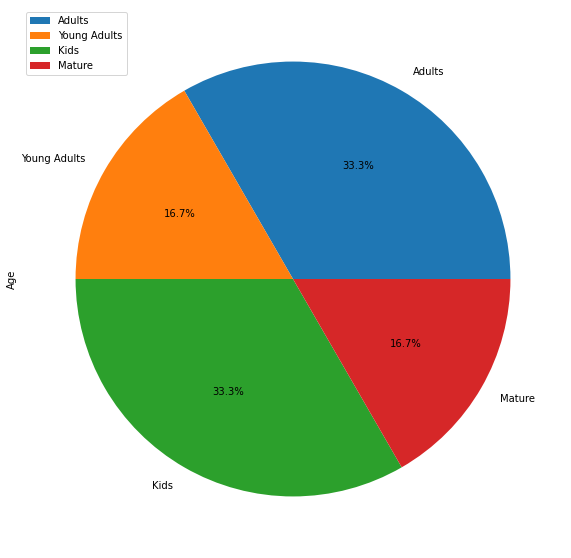

In [209]:
createUserCategorizationPlot()

In [210]:
def createPaymentCategorizationPlot():
    count = Counter(PaymentDetails["provider"].tolist())
    df = pandas.DataFrame.from_dict(count, orient='index', columns=['Payment Method'])
    df.plot.pie(y=0,autopct="%.1f%%", figsize=(10,10))

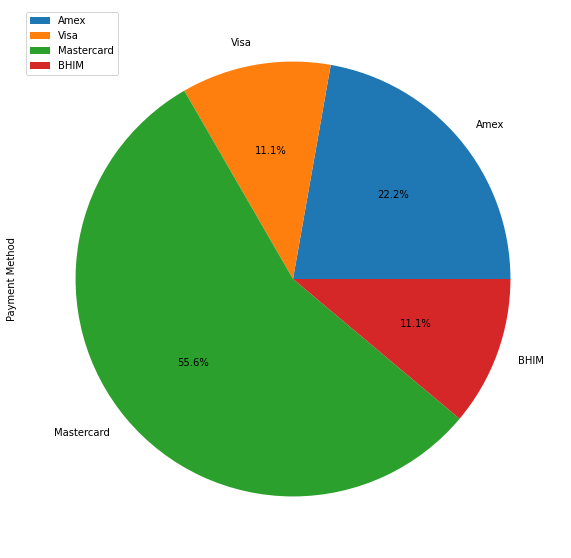

In [211]:
createPaymentCategorizationPlot()

In [212]:
def bestSellingProductsPlot():
    OO = pd.merge(OrderItems,OrderDetails,on='order_id')
    OO = pd.merge(OO,Product,on='product_id')
    OO = pd.merge(OO,ProductCategory,on='category_id')
    OO = pd.merge(OO,ProductCategory,left_on='parent_category_id',right_on='category_id')
    OO = pd.merge(OO,ProductCategory,left_on='parent_category_id_y',right_on='category_id')
    OO = OO["name_y"].iloc[:,1]
    count = Counter(OO.tolist())
    df = pandas.DataFrame.from_dict(count, orient='index', columns=['Product Category'])
    df.T.plot(kind='bar', label='index', color=['C0', 'C1', 'C2', 'C3', 'C4'], figsize=(10,10))
    #df.plot.bar(figsize=(10,10), label='index', color=['C0', 'C1', 'C2', 'C3'])

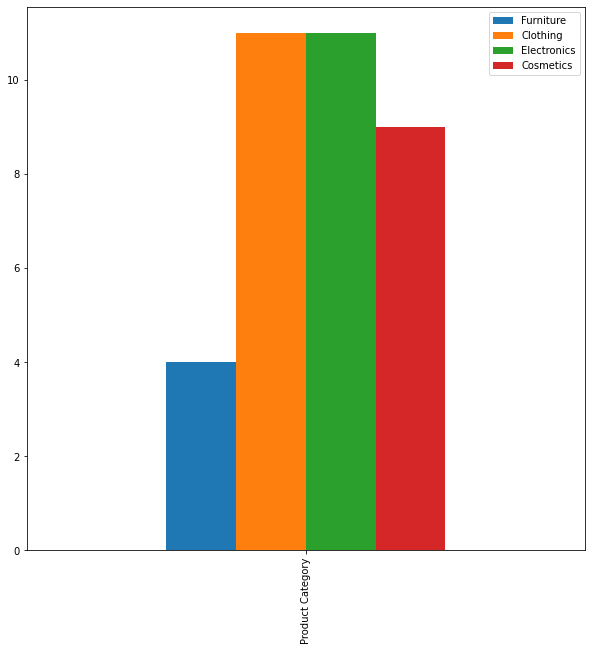

In [213]:
bestSellingProductsPlot()